In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import graphviz

In [2]:
train_size = 100000
test_size = 40000
columns = 2351

#path = "../Desktop/ember"
path = "./data"

x_train = np.memmap(path+"/X_train.dat", dtype=np.float32, mode="r", shape=(train_size, 2351))
y_train = np.memmap(path+"/y_train.dat", dtype=np.float32, mode="r", shape=train_size)

x_validation = x_train[70000:90000]
y_validation = y_train[70000:90000]

x_train = x_train[:60000]
y_train = y_train[:60000]

x_test = np.memmap(path+"/X_test.dat", dtype=np.float32, mode="r", shape=(test_size, 2351))
y_test = np.memmap(path+"/y_test.dat", dtype=np.float32, mode="r", shape=test_size)


In [3]:
counter = 0
for item in y_train:
    if item == 1.0:
        counter += 1
counter

32629

In [4]:
model = tree.DecisionTreeClassifier()
%time model.fit(x_train, y_train)
model.score(x_validation, y_validation)

CPU times: user 3min 39s, sys: 63.6 ms, total: 3min 40s
Wall time: 3min 40s


0.96475

In [5]:
model = tree.DecisionTreeClassifier(max_depth=50)
%time model.fit(x_train, y_train)
model.score(x_validation, y_validation)

CPU times: user 2min 43s, sys: 3.97 ms, total: 2min 43s
Wall time: 2min 43s


0.96455

In [6]:
max_depths = [1, 2, 5, 10, 20, 50, 100, 250, 500, 1000, 2000, 10000]
scores = []
for depth in max_depths:
    model = tree.DecisionTreeClassifier(max_depth=depth)
    %time model.fit(x_train, y_train)
    scores.append(model.score(x_validation, y_validation))

CPU times: user 6.23 s, sys: 0 ns, total: 6.23 s
Wall time: 6.23 s
CPU times: user 11.5 s, sys: 4 ms, total: 11.5 s
Wall time: 11.5 s
CPU times: user 28.9 s, sys: 0 ns, total: 28.9 s
Wall time: 29 s
CPU times: user 57.4 s, sys: 0 ns, total: 57.4 s
Wall time: 57.5 s
CPU times: user 1min 37s, sys: 0 ns, total: 1min 37s
Wall time: 1min 37s
CPU times: user 3min 8s, sys: 0 ns, total: 3min 8s
Wall time: 3min 8s
CPU times: user 3min 55s, sys: 0 ns, total: 3min 55s
Wall time: 3min 55s
CPU times: user 3min 28s, sys: 0 ns, total: 3min 28s
Wall time: 3min 28s
CPU times: user 3min 24s, sys: 0 ns, total: 3min 24s
Wall time: 3min 24s
CPU times: user 3min 26s, sys: 0 ns, total: 3min 26s
Wall time: 3min 26s
CPU times: user 3min 29s, sys: 7.97 ms, total: 3min 29s
Wall time: 3min 29s
CPU times: user 3min 24s, sys: 0 ns, total: 3min 24s
Wall time: 3min 24s


[0.79775,
 0.8573,
 0.91615,
 0.95475,
 0.9626,
 0.96375,
 0.964,
 0.9637,
 0.96425,
 0.9633,
 0.964,
 0.96305]

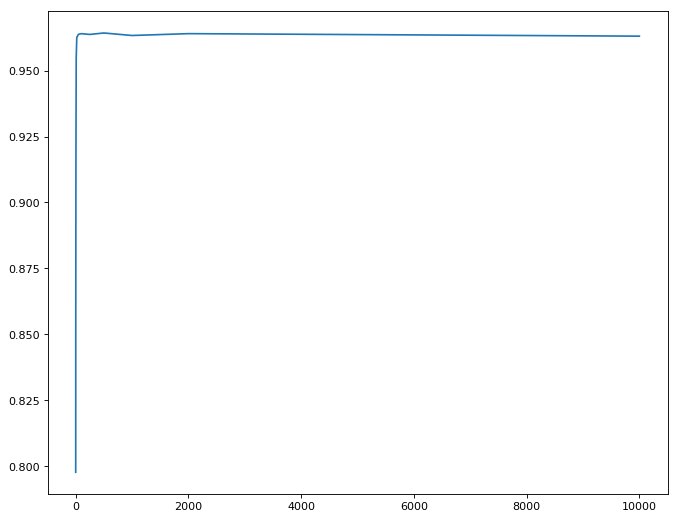

In [7]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(max_depths, scores)
scores

CPU times: user 3min 11s, sys: 172 ms, total: 3min 11s
Wall time: 3min 11s
CPU times: user 2min 53s, sys: 0 ns, total: 2min 53s
Wall time: 2min 53s
CPU times: user 2min 14s, sys: 4 ms, total: 2min 14s
Wall time: 2min 14s
CPU times: user 20.3 s, sys: 0 ns, total: 20.3 s
Wall time: 20.3 s
CPU times: user 11.3 s, sys: 0 ns, total: 11.3 s
Wall time: 11.3 s
CPU times: user 8.4 s, sys: 0 ns, total: 8.4 s
Wall time: 8.4 s
CPU times: user 5.03 s, sys: 0 ns, total: 5.03 s
Wall time: 5.03 s
CPU times: user 5.02 s, sys: 0 ns, total: 5.02 s
Wall time: 5.02 s
CPU times: user 5.03 s, sys: 0 ns, total: 5.03 s
Wall time: 5.03 s
CPU times: user 5.03 s, sys: 0 ns, total: 5.03 s
Wall time: 5.03 s


[0.88755,
 0.8684,
 0.8673,
 0.8655,
 0.8573,
 0.8573,
 0.79775,
 0.79775,
 0.79775,
 0.79775]

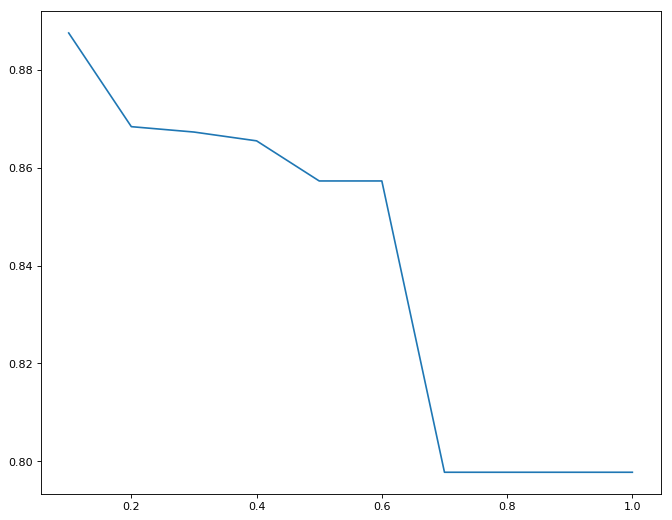

In [8]:
splits = np.linspace(0.1, 1.0, 10, endpoint=True)
scores = []
for split in splits:
    model = tree.DecisionTreeClassifier(min_samples_split=split)
    %time model.fit(x_train, y_train)
    scores.append(model.score(x_validation, y_validation))
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(splits, scores)
scores

CPU times: user 3min 47s, sys: 4 ms, total: 3min 47s
Wall time: 3min 47s
CPU times: user 1.91 s, sys: 0 ns, total: 1.91 s
Wall time: 1.91 s
CPU times: user 459 ms, sys: 0 ns, total: 459 ms
Wall time: 458 ms


[0.96425, 0.94845, 0.9323]

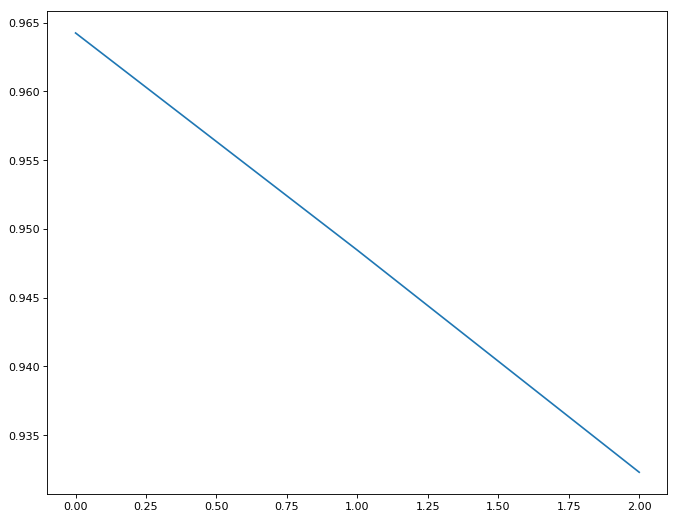

In [9]:
features = [None, "sqrt", "log2"]
scores = []
for feature in features:
    model = tree.DecisionTreeClassifier(max_features=feature)
    %time model.fit(x_train, y_train)
    scores.append(model.score(x_validation, y_validation))
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(scores)
scores

CPU times: user 18.4 s, sys: 1e+03 ns, total: 18.4 s
Wall time: 18.4 s
CPU times: user 10.6 s, sys: 0 ns, total: 10.6 s
Wall time: 10.6 s
CPU times: user 8.43 s, sys: 0 ns, total: 8.43 s
Wall time: 8.42 s
CPU times: user 4.76 s, sys: 0 ns, total: 4.76 s
Wall time: 4.76 s
CPU times: user 4.65 s, sys: 0 ns, total: 4.65 s
Wall time: 4.65 s


[0.8505, 0.80635, 0.79775, 0.7574, 0.73245]

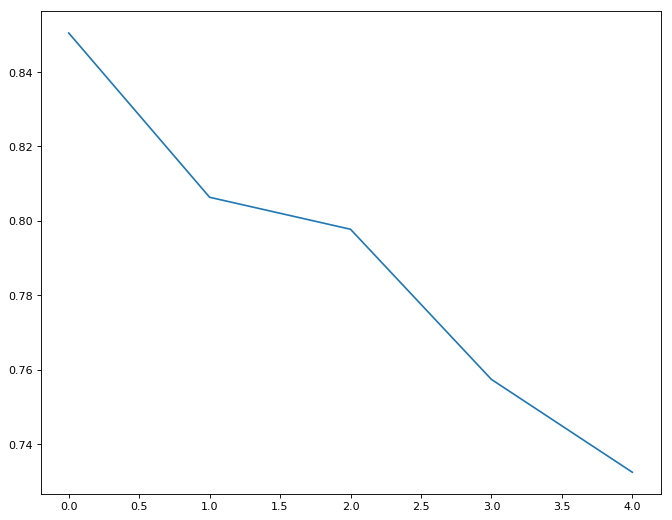

In [10]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
scores = []
for leaf in min_samples_leafs:
    model = tree.DecisionTreeClassifier(min_samples_leaf=leaf)
    %time model.fit(x_train, y_train)
    scores.append(model.score(x_validation, y_validation))
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(scores)
scores

In [11]:
model = tree.DecisionTreeClassifier(min_samples_leaf=2)
model.fit(x_train, y_train)
model.score(x_validation, y_validation)
model.score(x_test, y_test)

0.933475

In [12]:
dot_data = tree.export_graphviz(model, out_file=None,
                                filled=True, rounded=True,  
                                special_characters=True) 

In [13]:
graph = graphviz.Source(dot_data)  

In [14]:
graph